In [47]:
import torch
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import math

In [106]:
#frame_potential = torch.load('/home/minzhao.liu/Frame_Potential/results/frame_potential.pt').numpy()
frame_potential = torch.load('/home/minzhao.liu/Frame_Potential/results/k=5/frame_potential.pt').numpy()

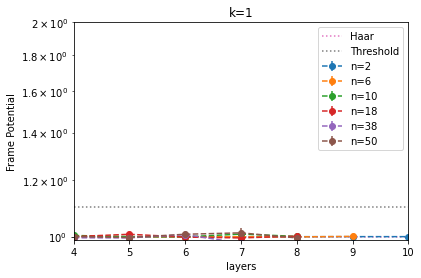

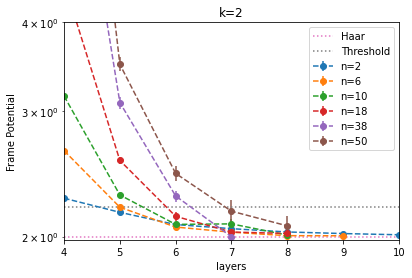

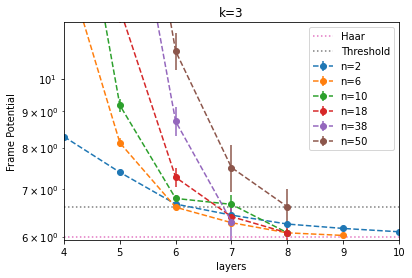

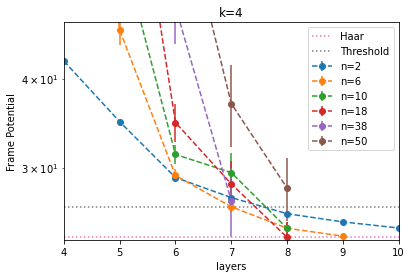

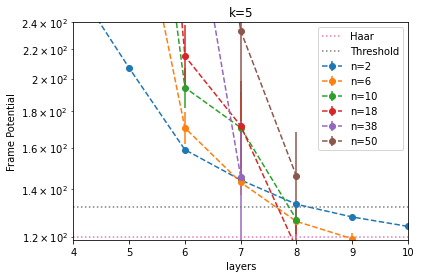

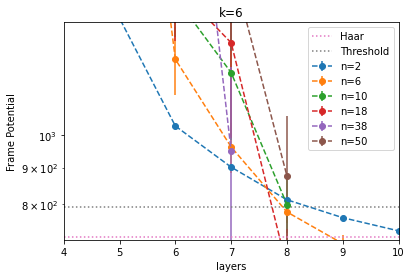

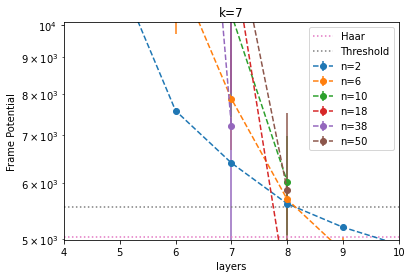

In [116]:
max_ns = 75
min_ns = 2
qubit_increment = 4
max_l = 10
min_l = 4
max_k = 7
x = np.linspace(min_l, max_l, num=max_l+1-min_l)
for k in range(1,max_k+1):
    
    #for n in range(min_ns, max_ns+1, qubit_increment):
    for n in [2,6,10,18,38,50]:
        data = frame_potential[n-1, min_l-1:max_l, k-1]
        if ~np.all(np.isnan(data)):
            plt.errorbar(x, data[:,0], label='n={}'.format(n), yerr=data[:,1], fmt='o', ls='--')
    haar = math.factorial(k)
    plt.yscale('log')
    plt.plot(x, np.ones(max_l+1-min_l)*haar, ':', label='Haar')
    plt.plot(x, np.ones(max_l+1-min_l)*haar*1.1, ':', label='Threshold')
    plt.ylim(0.99*haar,2*haar)
    plt.xlim(4,10)
    plt.xlabel('layers')
    plt.ylabel('Frame Potential')
    plt.title('k={}'.format(k))
    plt.legend()
    plt.show()

In [117]:
cond = np.zeros((frame_potential.shape)[:3])
cond[:,:,:] = False
met_layer = np.zeros((max_ns, max_k))
met_layer[:,:] = np.nan
for k in range(1, max_k+1):
    haar = math.factorial(k)
    cond[:,:,k-1] = (frame_potential[:,:,k-1,0] < haar*1.1) * (frame_potential[:,:,k-1,1] < haar/20)
for n in range(max_ns):
    for k in range(max_k):
        cond_for_layers = cond[n,:,k]
        try:
            layer = np.where(cond_for_layers==1)[0].min()+1
            met_layer[n,k] = layer
        except ValueError:
            pass
        
print(met_layer)

[[nan nan nan nan nan nan nan]
 [ 4.  5.  7.  8.  9.  9.  9.]
 [nan nan nan nan nan nan nan]
 [ 4.  5.  7.  8.  8.  9.  9.]
 [nan nan nan nan nan nan nan]
 [ 4.  5.  6.  8.  8.  8.  9.]
 [nan nan nan nan nan nan nan]
 [ 4.  6.  7.  8.  8.  9. 10.]
 [nan nan nan nan nan nan nan]
 [ 4.  6.  8.  8.  8. nan nan]
 [nan nan nan nan nan nan nan]
 [ 4.  6.  7.  8. nan nan nan]
 [nan nan nan nan nan nan nan]
 [ 4.  6.  7.  8. nan nan nan]
 [ 4.  6.  7.  8.  8. nan nan]
 [ 4.  6.  8.  8. nan nan nan]
 [nan nan nan nan nan nan nan]
 [ 4.  6.  7.  8. nan nan nan]
 [nan nan nan nan nan nan nan]
 [ 4.  6.  8.  8. nan nan nan]
 [nan nan nan nan nan nan nan]
 [ 4.  6. nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [ 4.  6. nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [ 4.  7. nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [ 4.  6. nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [ 4.  7. nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [nan na

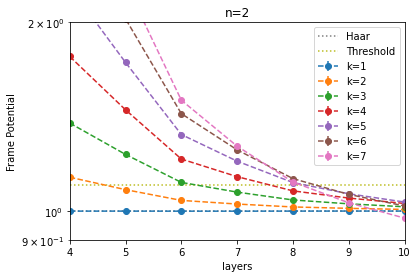

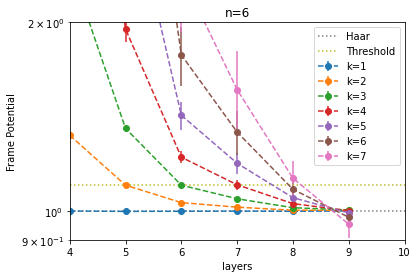

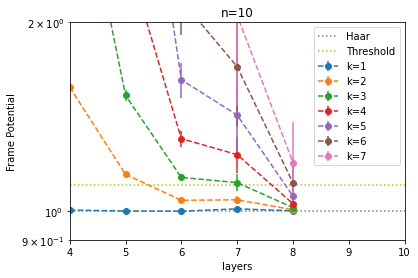

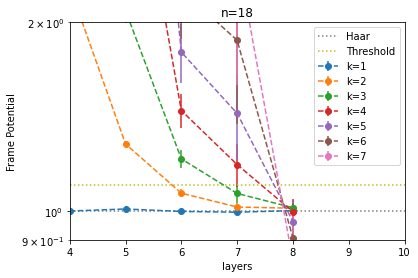

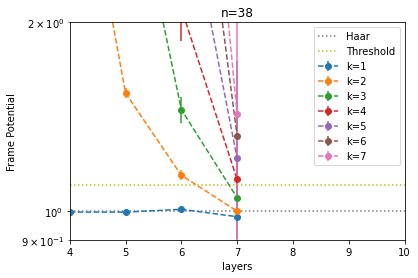

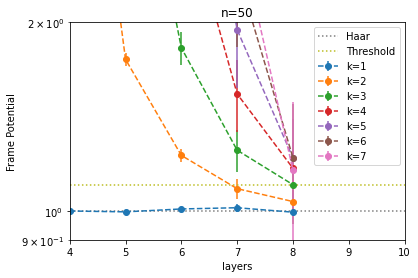

In [115]:
max_ns = 75
min_ns = 2
qubit_increment = 2
max_l = 10
min_l = 4
max_k = 7
x = np.linspace(min_l, max_l, num=max_l+1-min_l)
#for n in range(min_ns, max_ns+2, qubit_increment):
for n in [2,6,10,18,38,50]:
    for k in range(1,max_k+1):
        haar = math.factorial(k)
        data = frame_potential[n-1, min_l-1:max_l, k-1]/haar
        if ~np.all(np.isnan(data)):
            plt.errorbar(x, data[:,0], label='k={}'.format(k), yerr=data[:,1], fmt='o', ls='--')
    plt.plot(x, np.ones(max_l+1-min_l), ':', label='Haar')
    plt.plot(x, np.ones(max_l+1-min_l)*1.1, ':', label='Threshold')
    plt.yscale('log')
    plt.ylim(0.9,2)
    plt.xlim(4,10)
    plt.xlabel('layers')
    plt.ylabel('Frame Potential')
    plt.title('n={}'.format(n))
    plt.legend()
    plt.show()

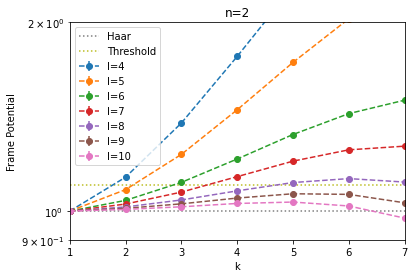

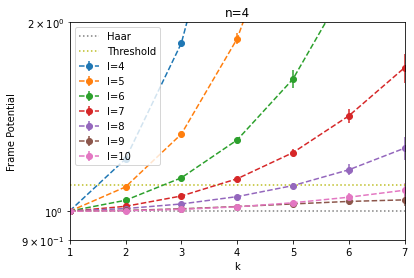

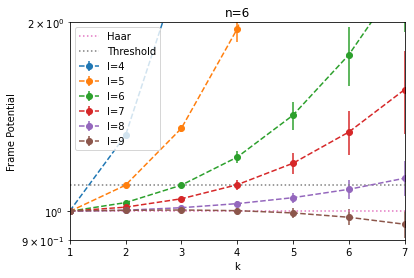

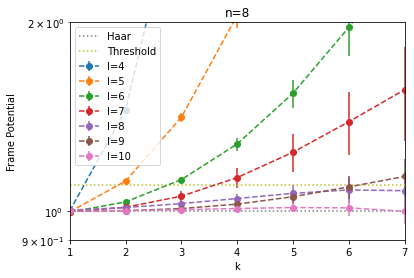

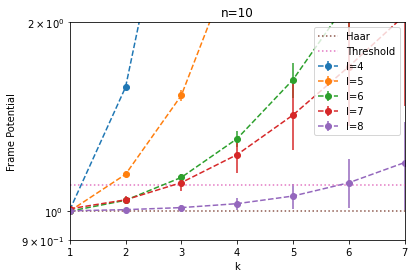

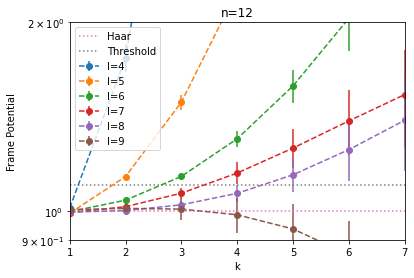

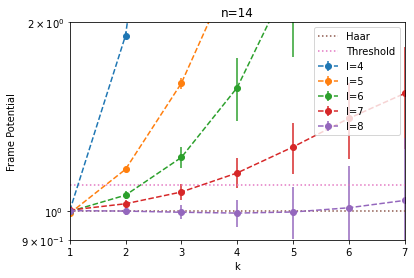

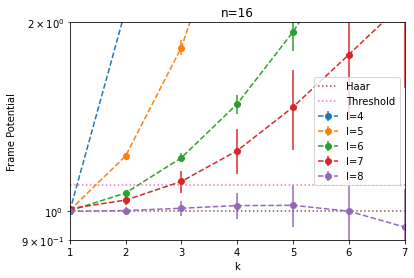

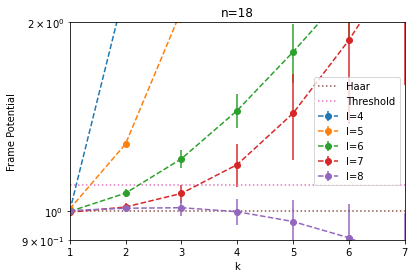

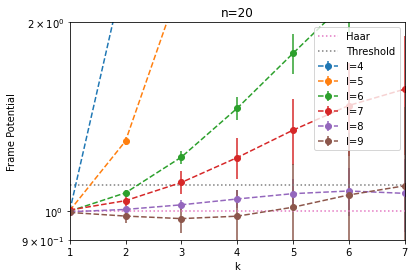

In [97]:
max_ns = 20
min_ns = 2
qubit_increment = 2
max_l = 10
min_l = 4
max_k = 7
k = np.linspace(1, max_k, num=max_k)
haar = scipy.special.factorial(k).repeat(2).reshape(max_k, 2)
for n in range(min_ns, max_ns+2, qubit_increment):
    for l in range(min_l,max_l+1):
        data = frame_potential[n-1, l-1]/haar
        if ~np.all(np.isnan(data)):
            plt.errorbar(k, data[:,0], label='l={}'.format(l), yerr=data[:,1], fmt='o', ls='--')
    plt.plot(k, np.ones(max_k), ':', label='Haar')
    plt.plot(k, np.ones(max_k)*1.1, ':', label='Threshold')
    plt.yscale('log')
    plt.ylim(0.9,2)
    plt.xlim(1,max_k)
    plt.xlabel('k')
    plt.ylabel('Frame Potential')
    plt.title('n={}'.format(n))
    plt.legend()
    plt.show()

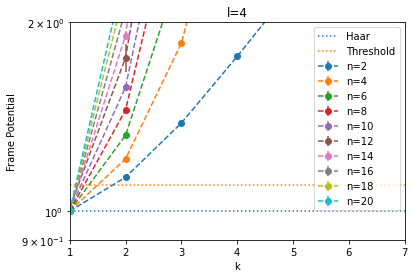

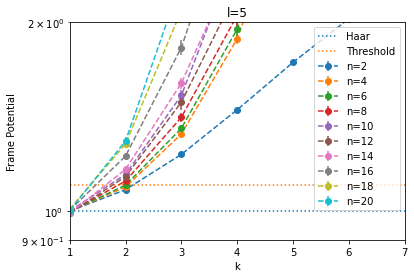

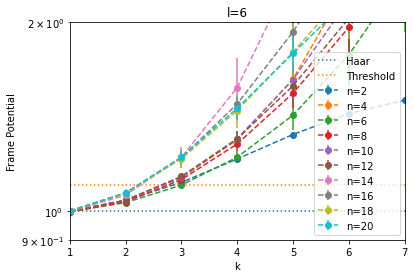

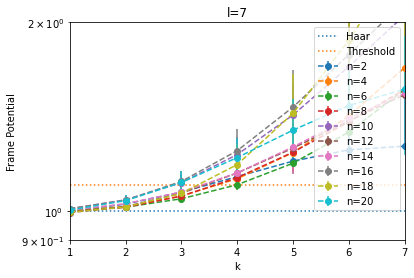

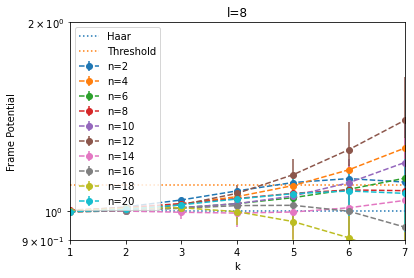

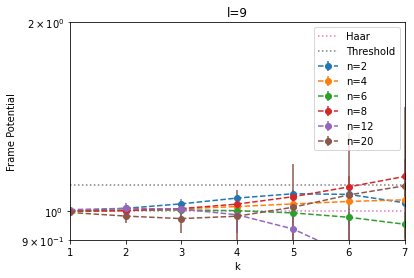

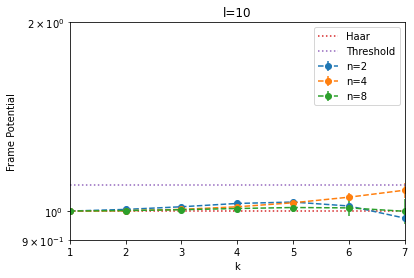

In [100]:
max_ns = 22
min_ns = 2
qubit_increment = 2
max_l = 10
min_l = 4
max_k = 7
k = np.linspace(1, max_k, num=max_k)
haar = scipy.special.factorial(k).repeat(2).reshape(max_k, 2)
for l in range(min_l,max_l+1):
    for n in range(min_ns, max_ns, qubit_increment):
        data = frame_potential[n-1, l-1]/haar
        if ~np.all(np.isnan(data)):
            plt.errorbar(k, data[:,0], label='n={}'.format(n), yerr=data[:,1], fmt='o', ls='--')
    plt.plot(k, np.ones(max_k), ':', label='Haar')
    plt.plot(k, np.ones(max_k)*1.1, ':', label='Threshold')
    plt.yscale('log')
    plt.ylim(0.9,2)
    plt.xlim(1,max_k)
    plt.xlabel('k')
    plt.ylabel('Frame Potential')
    plt.title('l={}'.format(l))
    plt.legend()
    plt.show()

In [94]:
data = np.random.rand(1000)
data = (data,)
res = scipy.stats.bootstrap(data, np.mean, confidence_level=0.9)
print(res)

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.4832958491931497, high=0.5133857705855916), standard_error=0.009137997902141426)
